
**Assignment 6**

**Image and Video Analytics**

**Vishali Sharma**

**21MIA1066**

Task 1: Tagging a Person in Videos Taken in a Situation
0n**
on**


In [15]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


Load Video:

Load the provided video file using OpenCV.


In [16]:
# Load video
cap = cv2.VideoCapture('person_vd.mp4')  # Provide your video file path
# Get the total number of frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total frames: {total_frames}")

Total frames: 341


**Person Detection:**

Use background subtraction or frame differencing to detect moving objects (people) in the video

**Tagging Output:**

Visualize the video with a bounding box and label/tag around the identified person as they move through the frames.

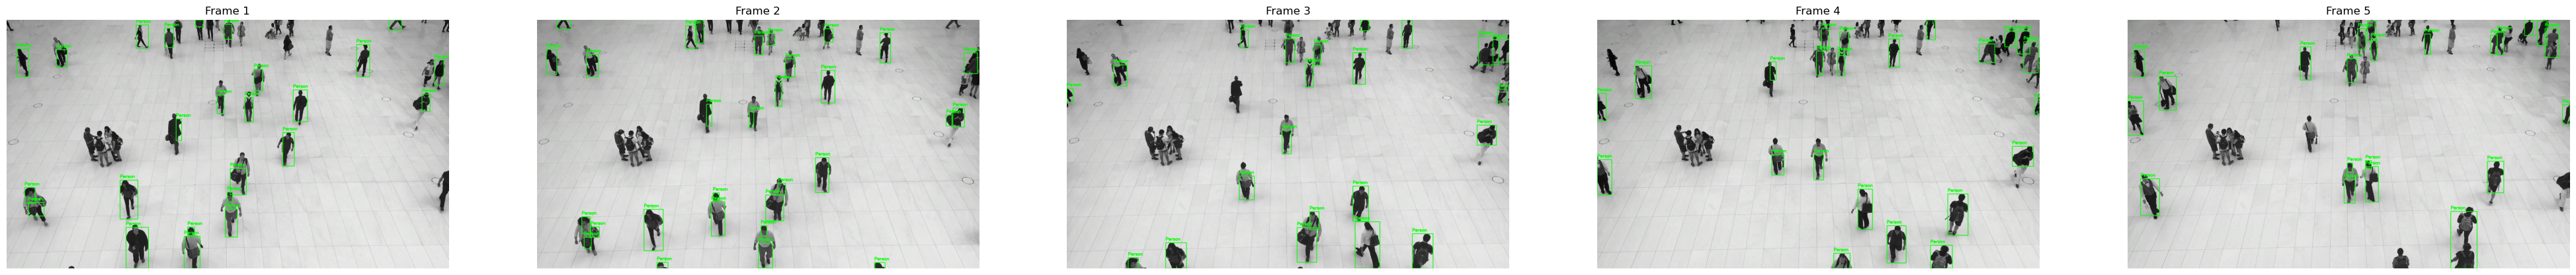

In [17]:


# Initialize the background subtractor (using MOG2)
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=True)

# Count total frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frames_to_display = 5  # Number of frames to display at the end
frame_start = total_frames - frames_to_display * 30  # Start capturing from here for the last few frames

# Variables to control frame selection and storage
selected_frames = []
frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction to get the foreground mask
    fg_mask = bg_subtractor.apply(frame)
    
    # Clean up the mask using morphological operations
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over each contour to detect and label people
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust threshold for your video
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, 'Person', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    # Save frames only near the end of the video
    if frame_count >= frame_start and frame_count % 30 == 0 and len(selected_frames) < frames_to_display:
        selected_frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    frame_count += 1
    
    # Display the frame with detected persons
    cv2.imshow('Detected Persons', frame)

    # Press 'q' to stop the video
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()
cv2.destroyAllWindows()

# Display the selected frames inline in the notebook
plt.figure(figsize=(50, 40))
for i, frame in enumerate(selected_frames):
    plt.subplot(1, len(selected_frames), i + 1)
    plt.imshow(frame)
    plt.axis('off')
    plt.title(f'Frame {i + 1}')
plt.show()


Apply basic feature extraction (color histograms, edge features) to isolate the target person based on appearance.

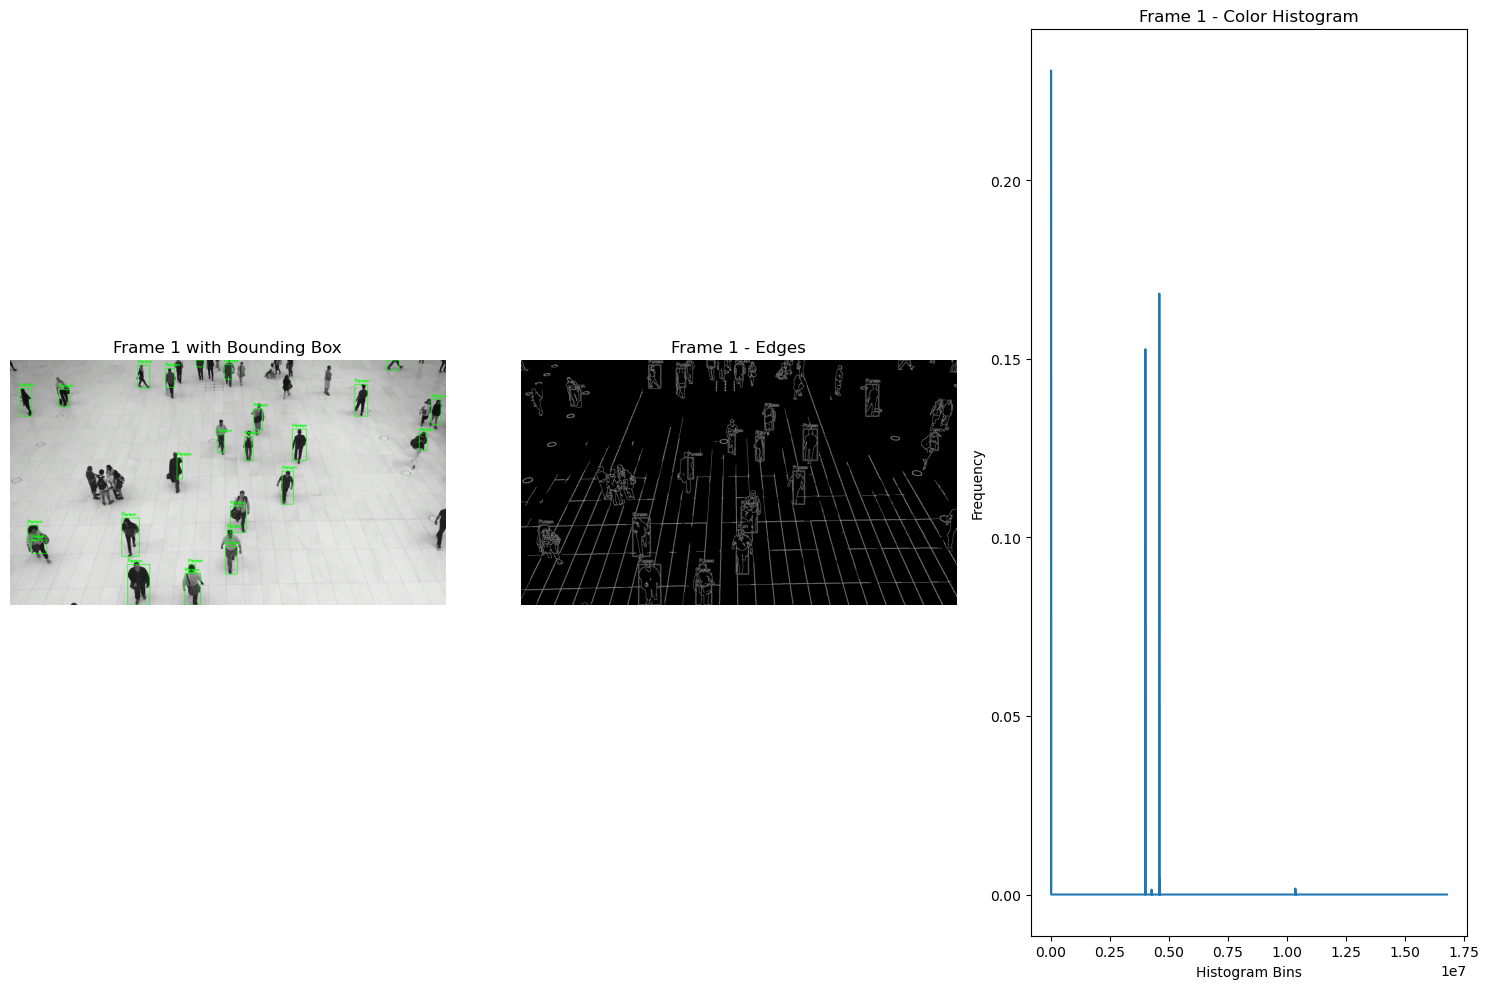

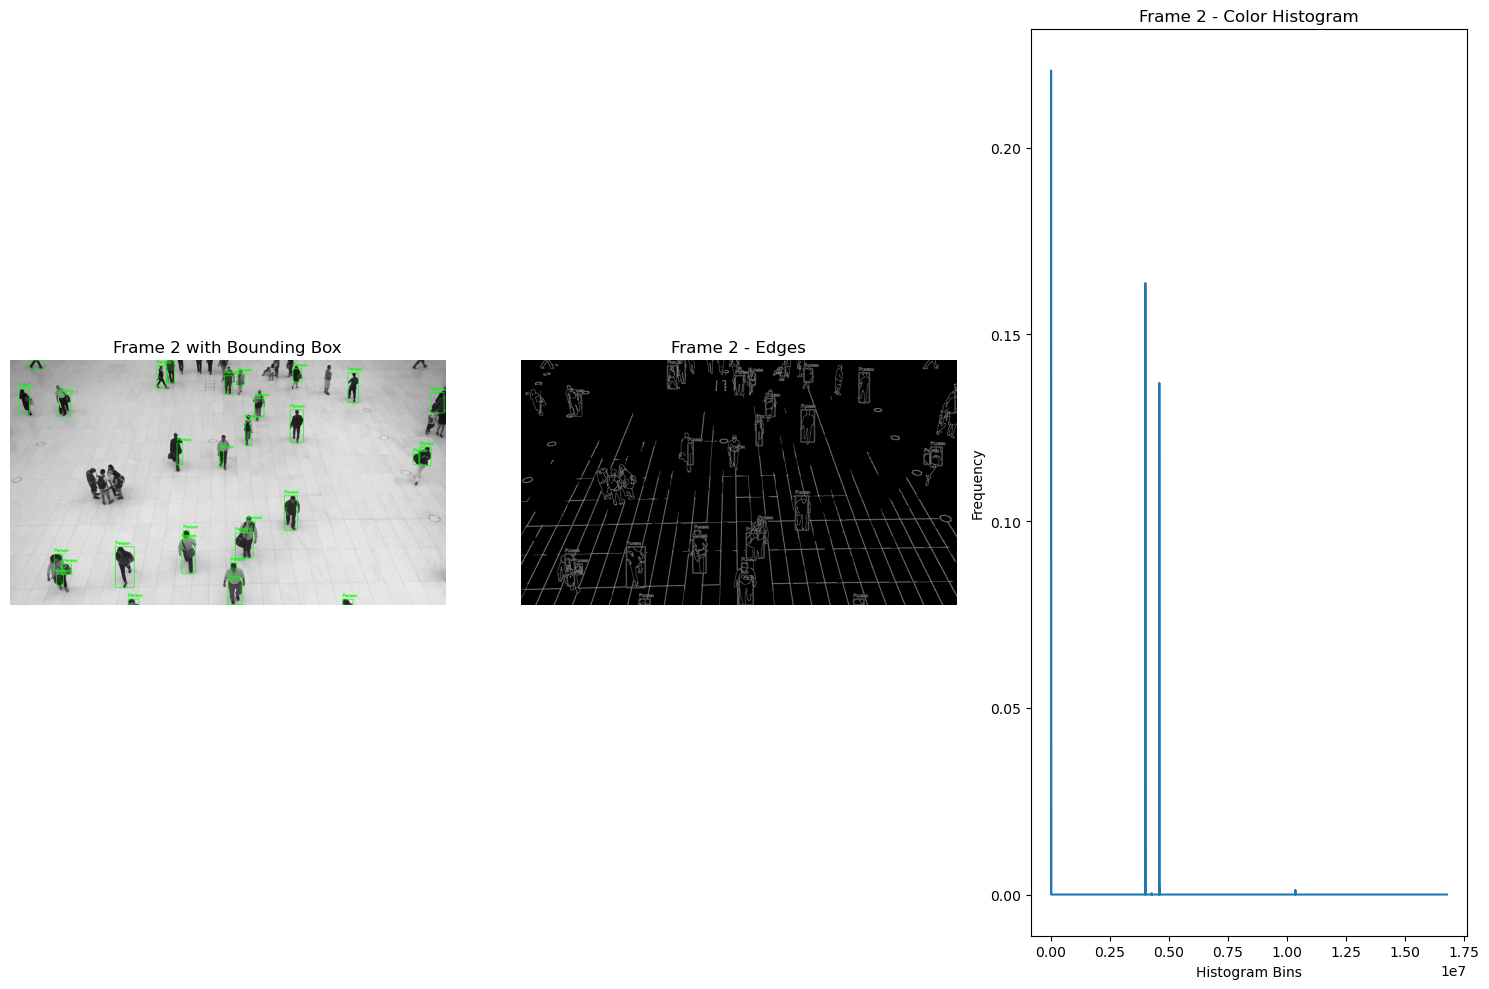

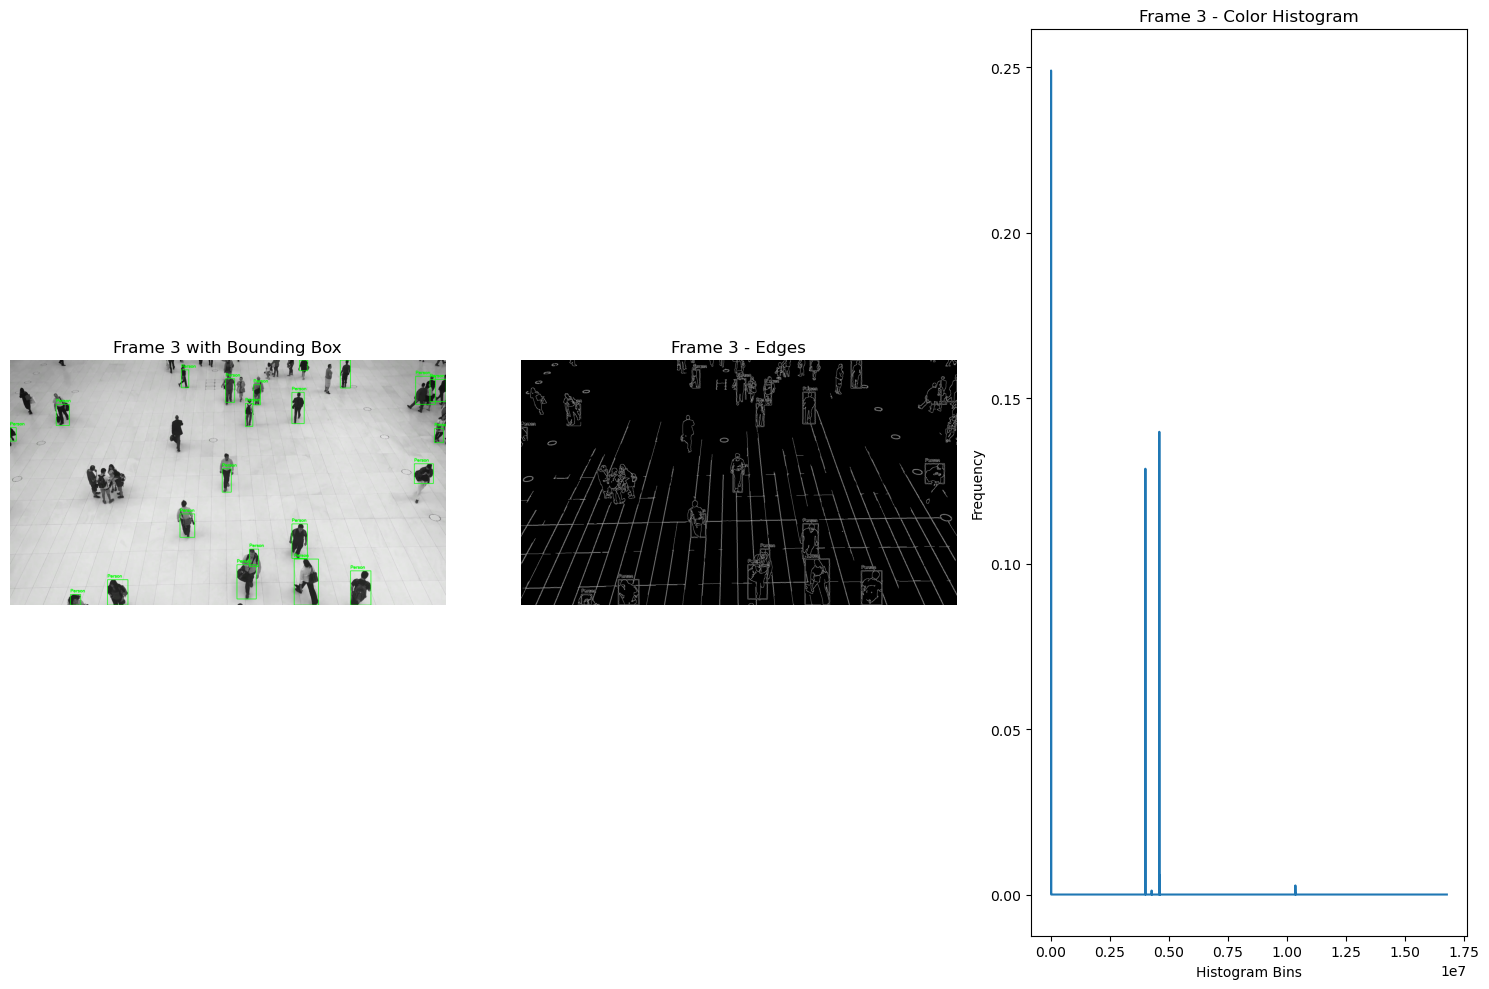

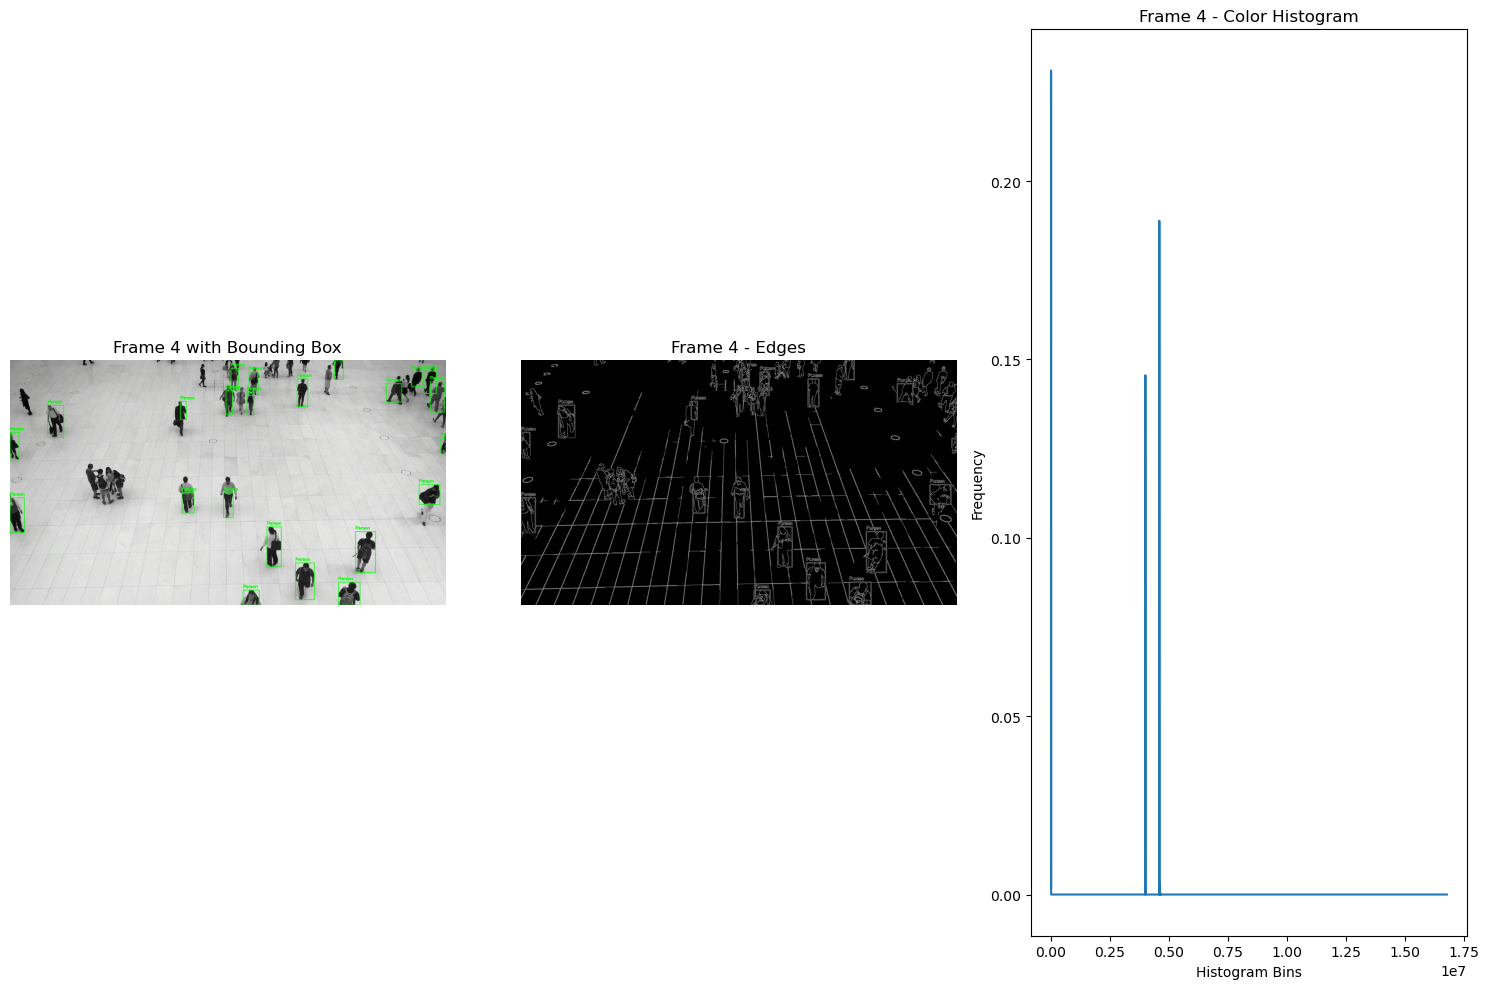

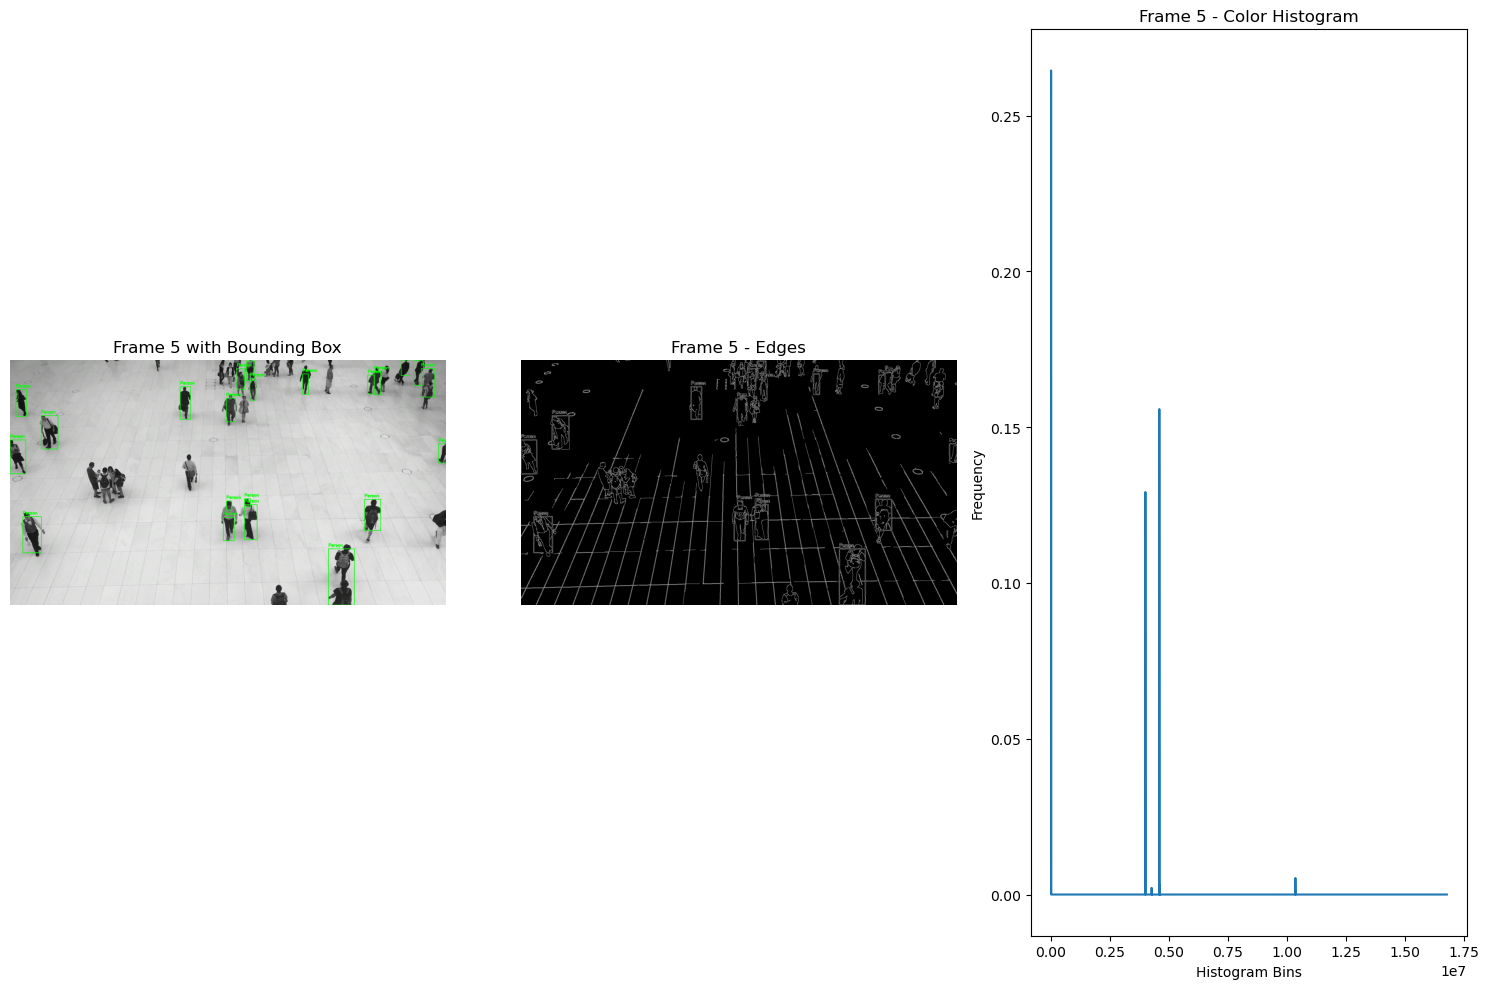

In [18]:
# Function for color histogram extraction
def extract_color_histogram(frame, mask=None):
    # Convert the frame to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Calculate the histogram of the HSV image
    hist = cv2.calcHist([hsv], [0, 1, 2], mask, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Function for edge detection using Canny
def extract_edges(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    return edges

# Continue from previous video capture and processing loop
selected_frames_features = []
frame_count = 0

# We will display the last 'frames_to_display' frames
for i, frame in enumerate(selected_frames):
    # Extract color histogram features
    hist = extract_color_histogram(frame)

    # Perform edge detection
    edges = extract_edges(frame)

    # Display the frame with bounding boxes
    plt.figure(figsize=(15, 10))

    # Original frame with bounding boxes
    plt.subplot(1, 3, 1)
    plt.imshow(frame)
    plt.title(f"Frame {i + 1} with Bounding Box")
    plt.axis('off')

    # Edge detection result
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Frame {i + 1} - Edges")
    plt.axis('off')

    # Color Histogram (Visualize as a 2D representation)
    plt.subplot(1, 3, 3)
    plt.plot(hist)
    plt.title(f"Frame {i + 1} - Color Histogram")
    plt.xlabel("Histogram Bins")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


**Person Tracking:**

Implement a tracking algorithm like centroid-based tracking or optical flow to tag and track the detected person across the video frames.

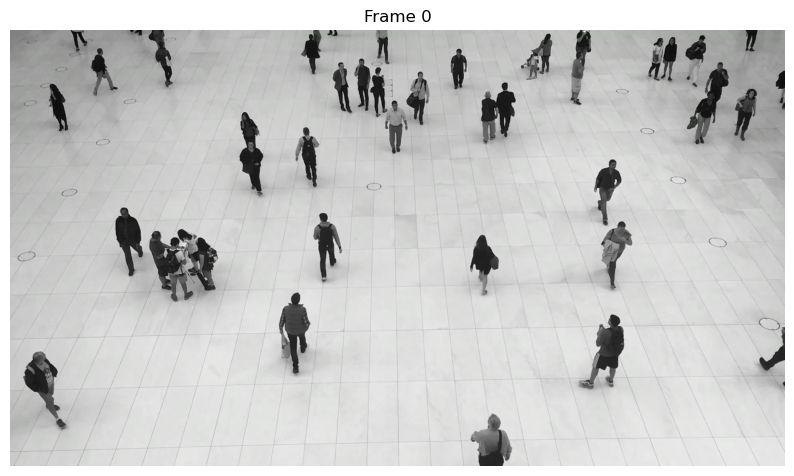

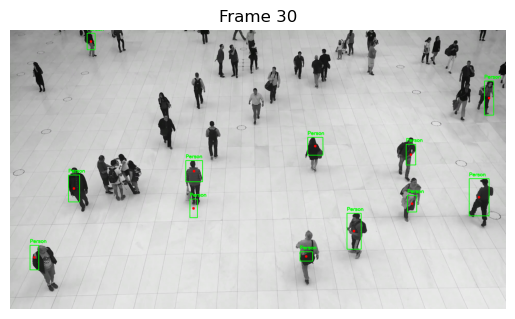

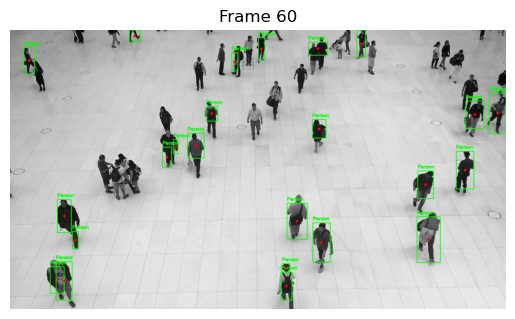

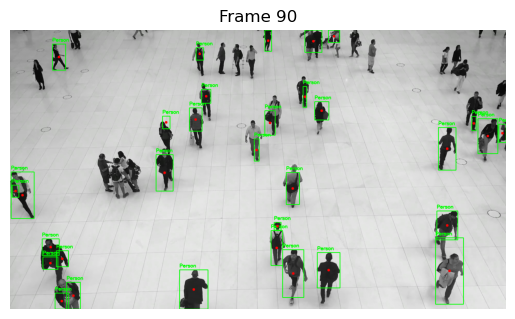

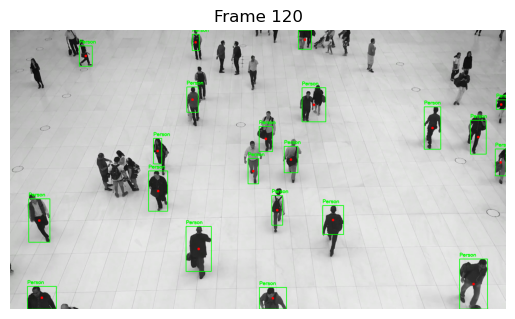

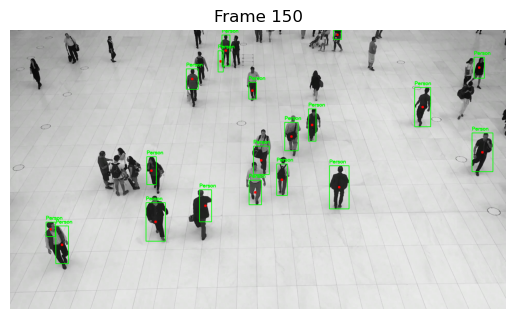

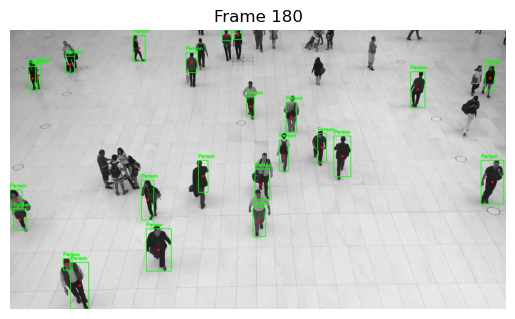

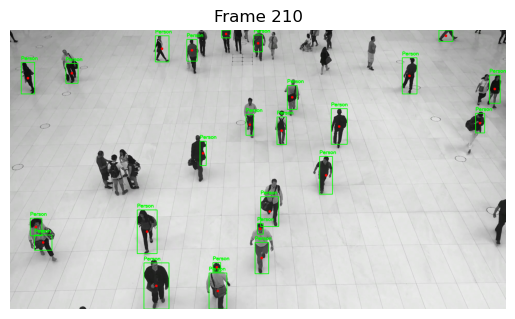

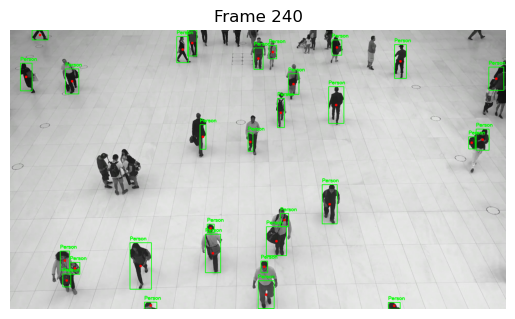

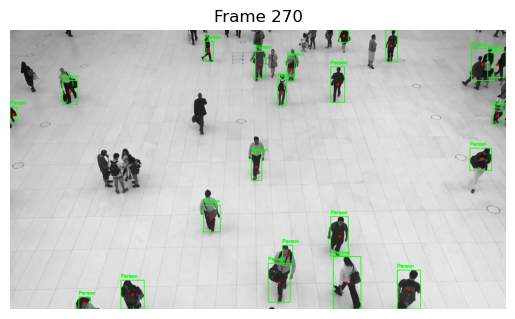

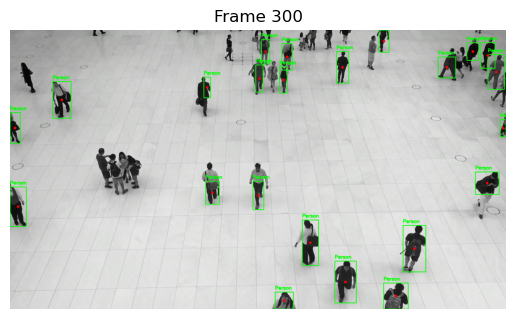

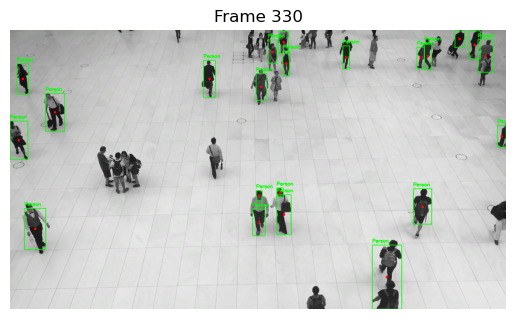

In [21]:
cap = cv2.VideoCapture('person_vd.mp4')  # Provide your video file path
# Initialize the background subtractor (using MOG2)
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=True)

frame_count = 0
frame_interval = 30  # Process every 30th frame

# Create a plot to show the frames in the notebook
plt.figure(figsize=(10, 6))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for optical flow calculation
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply background subtraction to get the foreground mask
    fg_mask = bg_subtractor.apply(frame)
    
    # Clean up the mask using morphological operations
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over each contour to detect and label people
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust threshold for your video
            x, y, w, h = cv2.boundingRect(contour)
            centroid = (int(x + w / 2), int(y + h / 2))  # Calculate the centroid
            
            # Draw bounding box and centroid
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.circle(frame, centroid, 5, (0, 0, 255), -1)  # Red dot for centroid
            cv2.putText(frame, 'Person', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Save every nth frame to the plot
    if frame_count % frame_interval == 0:
        # Convert frame to RGB for displaying in Matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Plot the frame in the notebook
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.title(f'Frame {frame_count}')
        plt.pause(0.01)  # Pause to update the plot
    
    frame_count += 1
    
    # Show the frame in a window (OpenCV window)
    cv2.imshow('Tracking with Centroid', frame)

    # Press 'q' to stop the video
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()
cv2.destroyAllWindows()

